## Red Wine QualityÎ•º ÏòàÏ∏°Ìï¥Î≥¥Ïûê

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('./winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
# 1. ÌäπÏÑ± ÏÇ¥Ìé¥Î≥¥Í∏∞
# - ÌíàÏßà Î∂ÑÌè¨, ÌûàÏä§ÌÜ†Í∑∏Îû®

# 2. ÌíàÏßàÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
# - Ïª¨Îüº ÎßéÏùÑ Îïå, ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Î∂ÑÎ™ÖÌïú Ïï†Îì§ ÏúÑÏ£ºÎ°úÎßå ÏÇ¥Î†§ÏÑú Î∂ÑÏÑùÌïòÏûê
# - ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî

# 3. quaility_labels Ïª¨Îüº ÏÉùÏÑ±
# - 0~5: 0
# - 6~7: 1
# - 8~10: 2

# 4. ÌõàÎ†®ÏÖã, ÌÖåÏä§Ìä∏ÏÖã ÎÇòÎàÑÍ∏∞
# 5. KNN ÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ ÌíàÏßàÏùÑ ÏòàÏ∏°
# 6. ÏÑ†Ìòï ÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏° (score ÎÜíÏó¨Î≥¥Ïûê)
# 7. Ridge, LassoÎ°ú Í∑úÏ†úÌï¥Í∞ÄÎ©¥ÏÑú ÏòàÏ∏°

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


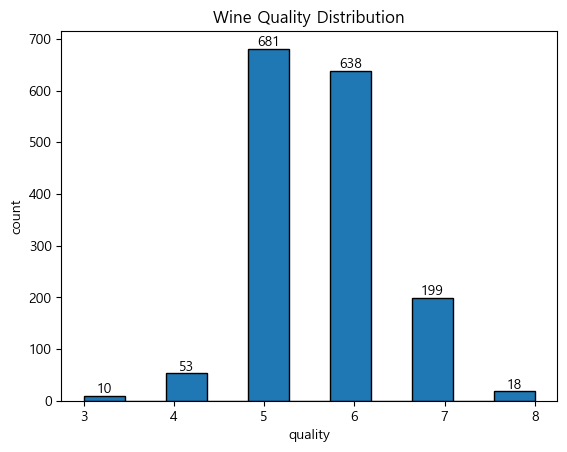

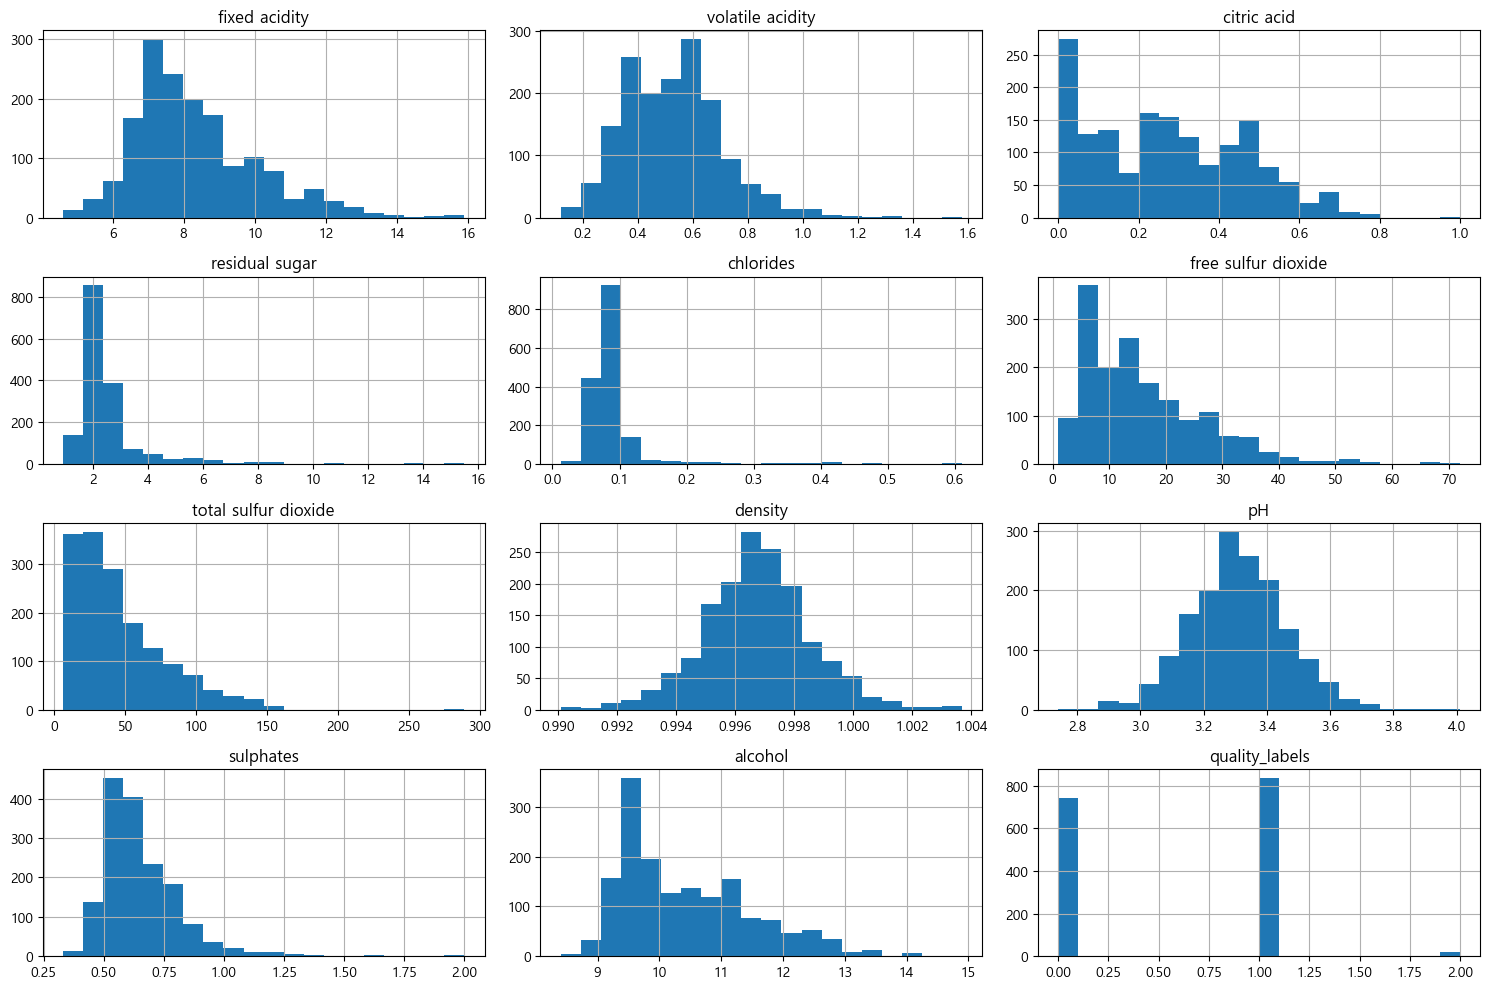

In [58]:
# 1-1. ÌíàÏßàÎ≥Ñ Í∞úÏàò ÌôïÏù∏
print(df['quality'].value_counts())

# 1-2. ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
counts, bins, bars = plt.hist(df['quality'], bins=11, edgecolor='black')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞úÏàò ÌëúÏãú
for count, bin_edge, bar in zip(counts, bins, bars):
    if count > 0:  # 0Ïù∏ Í≤ΩÏö∞Îäî ÌëúÏãú ÏïàÌï®
        plt.text(bar.get_x() + bar.get_width()/2, count, str(int(count)),
                 ha='center', va='bottom')

plt.xlabel('quality')
plt.ylabel('count')
plt.title('Wine Quality Distribution')
plt.show()


# 1-3. Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù -> Î∂ÑÌè¨ Î≥¥Í≥† Ïù¥Îî∞Í∞Ä Ïä§ÏºÄÏùº Ìï†Îïå Ï∞∏Í≥†!
numeric_cols = df.columns.drop('quality')

# 1-4. ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


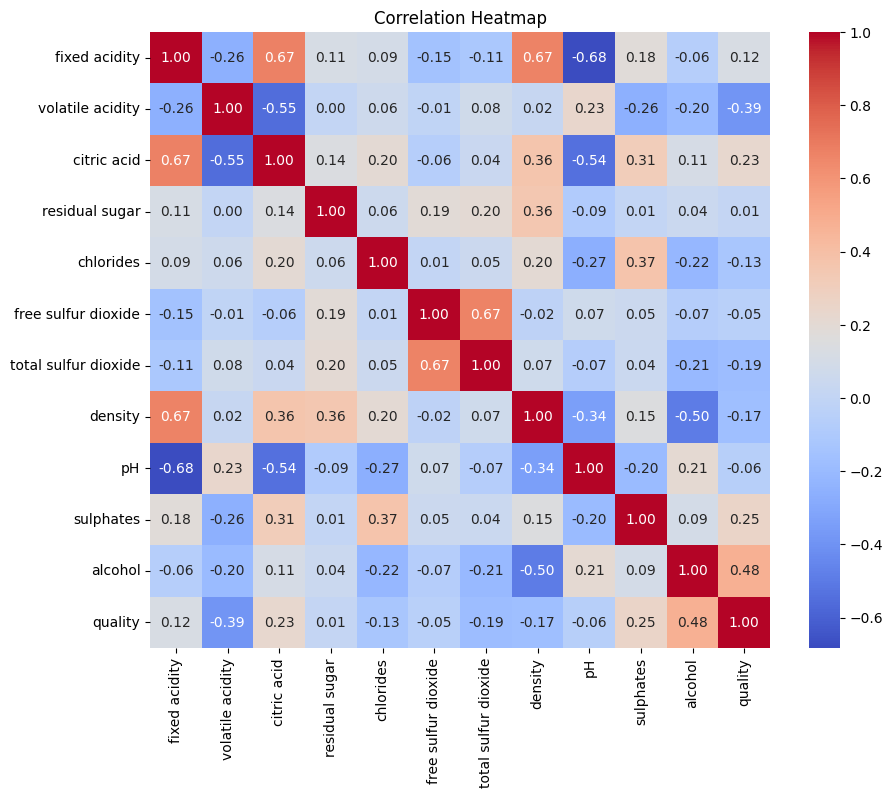

quality             1.000000
alcohol             0.476166
volatile acidity    0.390558
sulphates           0.251397
citric acid         0.226373
Name: quality, dtype: float64


In [24]:
# Ïà´ÏûêÌòï Ïª¨ÎüºÎì§Îßå ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
corr = df.corr(numeric_only=True)
print(corr['quality'].sort_values(ascending=False))

# ÌûàÌä∏ÎßµÏúºÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# qualityÏôÄ ÏÉÅÍ¥Ä ÎÜíÏùÄ Î≥ÄÏàò Î™á Í∞úÎßå Î≥¥Í∏∞
top_features = corr['quality'].abs().sort_values(ascending=False).head(5)
print(top_features)

In [ ]:
#ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò(‚àí1 ~ 1) Ìï¥ÏÑù Í∏∞Ï§Ä
# 0.1 ~ 0.3	ÏïΩÌïú ÏÉÅÍ¥Ä (weak)
# 0.3 ~ 0.5	Ï§ëÍ∞Ñ Ï†ïÎèÑ ÏÉÅÍ¥Ä (moderate)
# 0.5 ~ 0.7	ÎöúÎ†∑Ìïú ÏÉÅÍ¥Ä (strong)
# 0.7 Ïù¥ÏÉÅ	ÏïÑÏ£º Í∞ïÌïú ÏÉÅÍ¥Ä (very strong)

# alcohol             0.476166
# volatile acidity    0.390558
# EDAÎùºÎ©¥ ÏñòÎÑ§Î•º Ï£ºÎ°ú Î∂ÑÏÑùÌï†Í±∞Í≥†, 
# sulphates           0.251397
# citric acid         0.226373
# Î™®Îç∏ ÌïôÏäµÌï†Îïê ÏñòÎÑ§ÎèÑ ÎÑ£ÏùÑ Í±∞ÏûÑ
# Îã®Ïùº Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÇÆÏïÑÎèÑ, Îã§Î•∏ Î≥ÄÏàòÏôÄ Í≤∞Ìï©ÌïòÎ©¥ ÏòàÏ∏°Î†•Ïù¥ Ïò¨ÎùºÍ∞à Ïàò ÏûàÏùå

<Axes: >

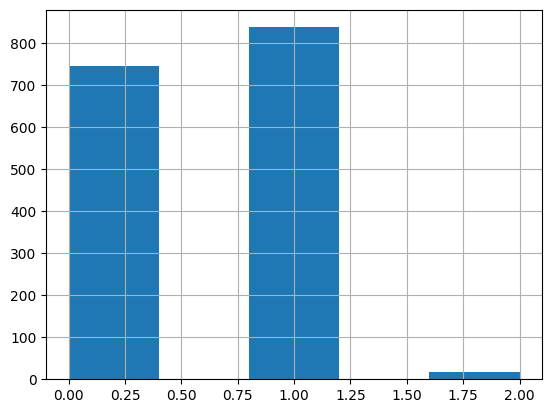

In [31]:
# quaility_labels Ïª¨Îüº ÏÉùÏÑ±
df['quality_labels'] = pd.cut(
    df['quality'],
    bins=[0, 5, 7, 10],       # Í≤ΩÍ≥ÑÍ∞í: 0~5 / 6~7 / 8~10
    labels=[0, 1, 2],         # Í∞ÅÍ∞Å ÎùºÎ≤®ÎßÅ
    include_lowest=True # Íµ¨Í∞Ñ ÎÇòÎàå Îïå ÏôºÏ™Ω(ÏµúÏÜåÍ∞í) Í≤ΩÍ≥ÑÍ∞íÏùÑ Ìè¨Ìï®ÏãúÌÇ¨ÏßÄ Ïó¨Î∂Ä
).astype(int)

df['quality_labels'].hist(bins=5)

### Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞ Î®∏Ïã†Îü¨Îãù ÌôúÏö©

In [50]:
# 4. ÌõàÎ†®ÏÖã, ÌÖåÏä§Ìä∏ÏÖã ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split

X = df[['alcohol', 'volatile acidity', 'sulphates', 'citric acid']].to_numpy()
y = df['quality'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'ÌõàÎ†®Îç∞Ïù¥ÌÑ∞: {len(X_train)}')
print(f'ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(X_test)}')


# Ïä§ÏºÄÏùºÎßÅ
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

ÌõàÎ†®Îç∞Ïù¥ÌÑ∞: 1279
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 320


In [53]:
# 5. KNN ÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ ÌíàÏßàÏùÑ ÏòàÏ∏°
from sklearn.neighbors import KNeighborsRegressor

# Ï£ºÎ≥Ä 5Í∞ú
kn = KNeighborsRegressor(n_neighbors=5)
kn.fit(X_train, y_train)

kn.score(X_train, y_train), kn.score(X_test, y_test)


(0.5271286313759906, 0.3810307984279503)

In [54]:
# 5-1. ÏµúÏ†ÅÏùò kÍ∞íÏùÑ Ï∞æÏïÑÏÑú.....
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors': list(range(3,11))}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_, grid.best_score_)

{'n_neighbors': 10} 0.3058895575611385


In [55]:
# 6. ÏÑ†Ìòï ÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏° (score ÎÜíÏó¨Î≥¥Ïûê)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr = LogisticRegression()
lr.fit(X_train, y_train)

# ÌõàÎ†®, ÌÖåÏä§Ìä∏ Ï†êÏàò
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.5824863174354965
0.55625


In [ ]:
# 7. Îã§Ìï≠ÌöåÍ∑Ä (Ïä§ÏºÄÏùºÎßÅ ÌïÑÏàò)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_results = []
for degree in [2, 3, 4]:
    print(f'\n{degree}Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò')
    # Îã§Ìï≠Ïãù ÌäπÏÑ± ÏÉùÏÑ±
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    print(f'ÏõêÎûò ÌäπÏÑ± Ïàò: {X_train.shape[1]}')
    print(f'Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: {X_train_poly.shape[1]}')

    # Î™®Îç∏ ÌõàÎ†®
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)

    # ÏÑ±Îä• ÌèâÍ∞Ä
    poly_score = lr_poly.score(X_test_poly, y_test)
    poly_results.append((degree, poly_score))
    print(f'Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: {degree} -> {poly_score:.4f}')

    # Overfitting Ï≤¥ÌÅ¨Î•º ÏúÑÌïú ÏÑ±Îä• ÌôïÏù∏
    train_score = lr_poly.score(X_train_poly, y_train)
    print(f'ÌõàÎ†® -> {train_score:.4f}')
    print(f'Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> {train_score - poly_score:.4f}')


best_degree, best_score = max(poly_results, key=lambda x: x[1])
print(best_degree, best_score)




# # ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Îã§Ïãú ÌõàÎ†®
# poly_best = PolynomialFeatures(degree=best_degree)
# X_train_poly_best = poly_best.fit_transform(X_train)
# X_test_poly_best = poly_best.transform(X_test)

# lr_poly_best = LinearRegression()
# lr_poly_best.fit(X_train_poly_best, y_train)
# lr_poly_best_score = lr_poly_best.score(X_test_poly_best, y_test)
# lr_poly_best_pred = lr_poly_best.predict(X_test_poly_best)


2Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò
ÏõêÎûò ÌäπÏÑ± Ïàò: 4
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: 14
Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: 2 -> 0.3948
ÌõàÎ†® -> 0.3561
Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> -0.0388

3Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò
ÏõêÎûò ÌäπÏÑ± Ïàò: 4
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: 34
Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: 3 -> 0.4143
ÌõàÎ†® -> 0.3863
Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> -0.0280

4Ï∞®Ïàò Îã§Ìï≠Ïãù ÌäπÏÑ± Ïã§Ìóò
ÏõêÎûò ÌäπÏÑ± Ïàò: 4
Îã§Ìï≠Ïãù ÌäπÏÑ± Ïàò: 69
Îã§Ìï≠Ïãù Ï∞®ÏàòÎ≥Ñ Ï†êÏàò: 4 -> 0.2475
ÌõàÎ†® -> 0.4291
Í≥ºÏ†ÅÌï©Ï†ïÎèÑ -> 0.1816
3 0.4142644628153054


In [ ]:
# # ÏòàÏ∏° vs Ïã§Ï†úÍ∞í ÎπÑÍµê
# plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
# plt.scatter(y_test, lr_basic_pred, alpha=0.6, color='blue')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('Ïã§Ï†ú ÌíàÏßà')
# plt.ylabel('ÏòàÏ∏° ÌíàÏßà')
# plt.title(f'Í∏∞Î≥∏ ÏÑ†Ìòï ÌöåÍ∑Ä\n(R¬≤ = {lr_basic_score:.3f})')

# plt.subplot(1, 3, 2)
# plt.scatter(y_test, lr_poly_best_pred, alpha=0.6, color='green')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('Ïã§Ï†ú ÌíàÏßà')
# plt.ylabel('ÏòàÏ∏° ÌíàÏßà')
# plt.title(f'Îã§Ìï≠Ïãù ÏÑ†ÌòïÌöåÍ∑Ä (degree={best_degree})\n(R¬≤ = {lr_poly_best_score:.3f})')

# plt.subplot(1, 3, 3)
# # ÏûîÏ∞® ÎπÑÍµê
# residuals_basic = y_test - lr_basic_pred
# residuals_poly = y_test - lr_poly_best_pred

# plt.scatter(lr_basic_pred, residuals_basic, alpha=0.6, color='blue', label='Í∏∞Î≥∏')
# plt.scatter(lr_poly_best_pred, residuals_poly, alpha=0.6, color='green', label='Îã§Ìï≠Ïãù')
# plt.axhline(y=0, color='black', linestyle='--')
# plt.xlabel('ÏòàÏ∏° ÌíàÏßà')
# plt.ylabel('ÏûîÏ∞® (Ïã§Ï†ú-ÏòàÏ∏°)')
# plt.title('ÏûîÏ∞® ÎπÑÍµê')
# plt.legend()

# plt.tight_layout()
# plt.show()

# improvement = lr_poly_best_score - lr_basic_score
# print(f"ÏÑ±Îä• Ìñ•ÏÉÅ: {improvement:.4f} ({improvement/lr_basic_score*100:.1f}%)")

In [62]:
# 8. Ridge, LassoÎ°ú Í∑úÏ†úÌï¥Í∞ÄÎ©¥ÏÑú ÏòàÏ∏°
from sklearn.linear_model import Ridge, Lasso

# Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥ Ridge/Lasso Ï†ÅÏö© (ÏïûÏÑú ÎßåÎì† ÏµúÏ†Å degree ÏÇ¨Ïö©)
print(f"Îã§Ìï≠Ïãù ÌäπÏÑ± (degree={best_degree}) Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©:")
print(f"ÌäπÏÑ± Ïàò: {X_train_poly_best.shape[1]}Í∞ú")

# Ridge ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥)
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_scores_poly = []
ridge_train_scores = []

print("\nRidge ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):")
for alpha in alphas:
    ridge_poly = Ridge(alpha=alpha)
    ridge_poly.fit(X_train_poly_best, y_train)
    
    # ÌÖåÏä§Ìä∏ ÏÑ±Îä•
    ridge_score = ridge_poly.score(X_test_poly_best, y_test)
    ridge_scores_poly.append(ridge_score)
    
    # ÌõàÎ†® ÏÑ±Îä• (Í≥ºÏ†ÅÌï© Ï≤¥ÌÅ¨Ïö©)
    ridge_train_score = ridge_poly.score(X_train_poly_best, y_train)
    ridge_train_scores.append(ridge_train_score)
    
    print(f"  alpha={alpha:7.3f}: ÌÖåÏä§Ìä∏={ridge_score:.4f}, ÌõàÎ†®={ridge_train_score:.4f}, Ï∞®Ïù¥={ridge_train_score-ridge_score:.4f}")

best_ridge_alpha_poly = alphas[np.argmax(ridge_scores_poly)]
best_ridge_score_poly = max(ridge_scores_poly)

# Lasso ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±Ïóê ÎåÄÌï¥)
lasso_scores_poly = []
lasso_train_scores = []

print("\nLasso ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):")
for alpha in alphas:
    lasso_poly = Lasso(alpha=alpha, max_iter=2000)
    lasso_poly.fit(X_train_poly_best, y_train)
    
    # ÌÖåÏä§Ìä∏ ÏÑ±Îä•
    lasso_score = lasso_poly.score(X_test_poly_best, y_test)
    lasso_scores_poly.append(lasso_score)
    
    # ÌõàÎ†® ÏÑ±Îä•
    lasso_train_score = lasso_poly.score(X_train_poly_best, y_train)
    lasso_train_scores.append(lasso_train_score)
    
    print(f"  alpha={alpha:7.3f}: ÌÖåÏä§Ìä∏={lasso_score:.4f}, ÌõàÎ†®={lasso_train_score:.4f}, Ï∞®Ïù¥={lasso_train_score-lasso_score:.4f}")

best_lasso_alpha_poly = alphas[np.argmax(lasso_scores_poly)]
best_lasso_score_poly = max(lasso_scores_poly)

print(f"\nüèÜ ÏµúÏ†Å ÏÑ±Îä•:")
print(f"Ridge (Îã§Ìï≠Ïãù) - alpha: {best_ridge_alpha_poly}, Score: {best_ridge_score_poly:.4f}")
print(f"Lasso (Îã§Ìï≠Ïãù) - alpha: {best_lasso_alpha_poly}, Score: {best_lasso_score_poly:.4f}")

Îã§Ìï≠Ïãù ÌäπÏÑ± (degree=3) Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©:
ÌäπÏÑ± Ïàò: 35Í∞ú

Ridge ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):
  alpha=  0.001: ÌÖåÏä§Ìä∏=0.4143, ÌõàÎ†®=0.3863, Ï∞®Ïù¥=-0.0280
  alpha=  0.010: ÌÖåÏä§Ìä∏=0.4143, ÌõàÎ†®=0.3863, Ï∞®Ïù¥=-0.0280
  alpha=  0.100: ÌÖåÏä§Ìä∏=0.4143, ÌõàÎ†®=0.3863, Ï∞®Ïù¥=-0.0280
  alpha=  1.000: ÌÖåÏä§Ìä∏=0.4142, ÌõàÎ†®=0.3863, Ï∞®Ïù¥=-0.0279
  alpha= 10.000: ÌÖåÏä§Ìä∏=0.4133, ÌõàÎ†®=0.3862, Ï∞®Ïù¥=-0.0272
  alpha=100.000: ÌÖåÏä§Ìä∏=0.4019, ÌõàÎ†®=0.3811, Ï∞®Ïù¥=-0.0208
  alpha=1000.000: ÌÖåÏä§Ìä∏=0.3438, ÌõàÎ†®=0.3327, Ï∞®Ïù¥=-0.0111

Lasso ÌöåÍ∑Ä (Îã§Ìï≠Ïãù ÌäπÏÑ±):
  alpha=  0.001: ÌÖåÏä§Ìä∏=0.4145, ÌõàÎ†®=0.3861, Ï∞®Ïù¥=-0.0284
  alpha=  0.010: ÌÖåÏä§Ìä∏=0.4097, ÌõàÎ†®=0.3786, Ï∞®Ïù¥=-0.0311
  alpha=  0.100: ÌÖåÏä§Ìä∏=0.3259, ÌõàÎ†®=0.3059, Ï∞®Ïù¥=-0.0201
  alpha=  1.000: ÌÖåÏä§Ìä∏=0.0155, ÌõàÎ†®=0.0243, Ï∞®Ïù¥=0.0089
  alpha= 10.000: ÌÖåÏä§Ìä∏=-0.0056, ÌõàÎ†®=0.0000, Ï∞®Ïù¥=0.0056
  alpha=100.000: ÌÖåÏä§Ìä∏=-0.0056, ÌõàÎ†®=0.0000, Ï∞®Ïù¥=0.0056
  alpha=1000.000: ÌÖåÏä

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

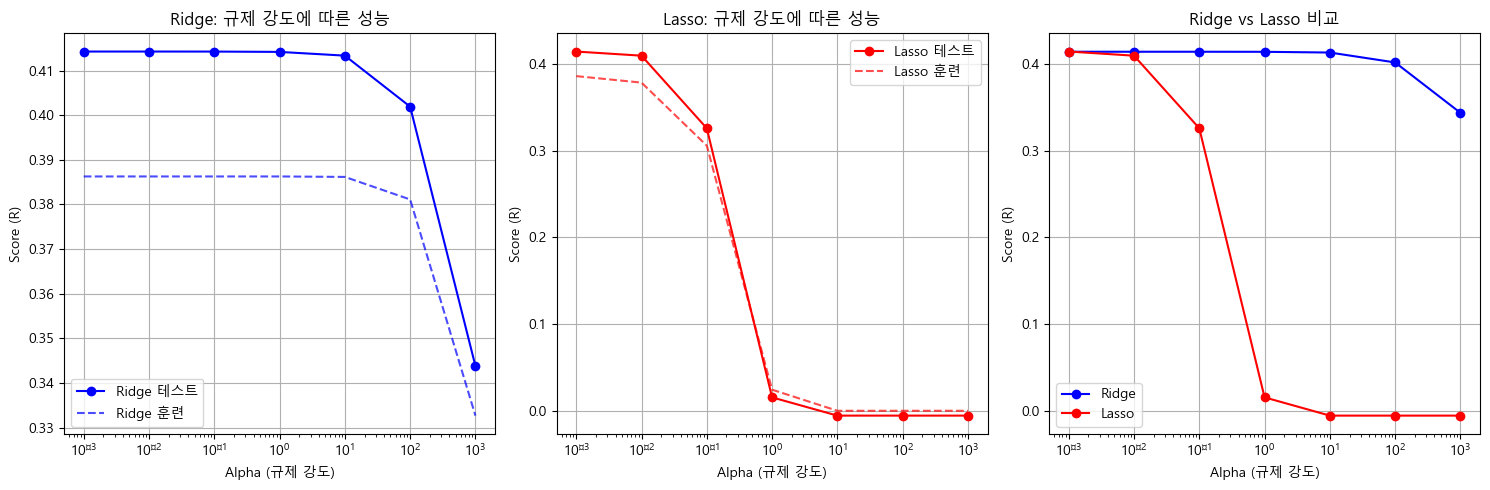

In [63]:
# Alpha Í∞íÏóê Îî∞Î•∏ ÏÑ±Îä• ÎπÑÍµê (ÌõàÎ†® vs ÌÖåÏä§Ìä∏)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge ÌÖåÏä§Ìä∏')
plt.plot(alphas, ridge_train_scores, 'b--', alpha=0.7, label='Ridge ÌõàÎ†®')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Ridge: Í∑úÏ†ú Í∞ïÎèÑÏóê Îî∞Î•∏ ÏÑ±Îä•')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso ÌÖåÏä§Ìä∏')
plt.plot(alphas, lasso_train_scores, 'r--', alpha=0.7, label='Lasso ÌõàÎ†®')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Lasso: Í∑úÏ†ú Í∞ïÎèÑÏóê Îî∞Î•∏ ÏÑ±Îä•')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(alphas, ridge_scores_poly, 'bo-', label='Ridge')
plt.plot(alphas, lasso_scores_poly, 'ro-', label='Lasso')
plt.xlabel('Alpha (Í∑úÏ†ú Í∞ïÎèÑ)')
plt.ylabel('Score (R)')
plt.title('Ridge vs Lasso ÎπÑÍµê')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()